# COGS 118A: Supervised Machine Learning Algorithms
## Perceptron

I use this notebook as a starting point to code the answers to the coding questions of my assignment, which demonstrates using the Iris dataset to conduct perceptron to determine appropriate decision boundary of the classification of whether a flower was a Setosa or Virginica. The training loss curve is also plotted as the number of iterations increase, which was compared to the logistic regression file.

In [71]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Load the modified Iris dataset

In [72]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1).astype(np.float) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 
Y[Y==0] = -1

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  -1 ]

(150, 4)
(150, 1)
[ 5.8  4.   1.2  0.2 -1. ]


In [73]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]


X_train = X_shuffled[:100][:,[3,1]] # Shape: (100,2)
X_train = np.delete(X_train, 42, axis=0) # Remove a point for separability.
Y_train = Y_shuffled[:100]          # Shape: (100,)
Y_train = np.delete(Y_train, 42, axis=0) # Remove a point for separability.
X_test = X_shuffled[100:][:,[3,1]]  # Shape: (50,2)
Y_test = Y_shuffled[100:]           # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(99, 2)
(99,)
(50, 2)
(50,)


### Visualization

In [74]:
def vis(X, Y, W=None, b=None):
    indices_neg1 = (Y == -1).nonzero()[0]
    indices_pos1 = (Y == 1).nonzero()[0]
    plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1], 
                c='blue', label='class -1')
    plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1], 
                c='red', label='class 1')
    plt.legend()
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    
    if W is not None:
        # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1
        w0 = W[0]
        w1 = W[1]
        temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0
        x0_min = max(temp.min(), X[:,0].min())
        x0_max = min(temp.max(), X[:,1].max())
        x0 = np.linspace(x0_min,x0_max,100)
        x1 = -w0*x0/w1-b/w1
        plt.plot(x0,x1,color='black')

    plt.show()

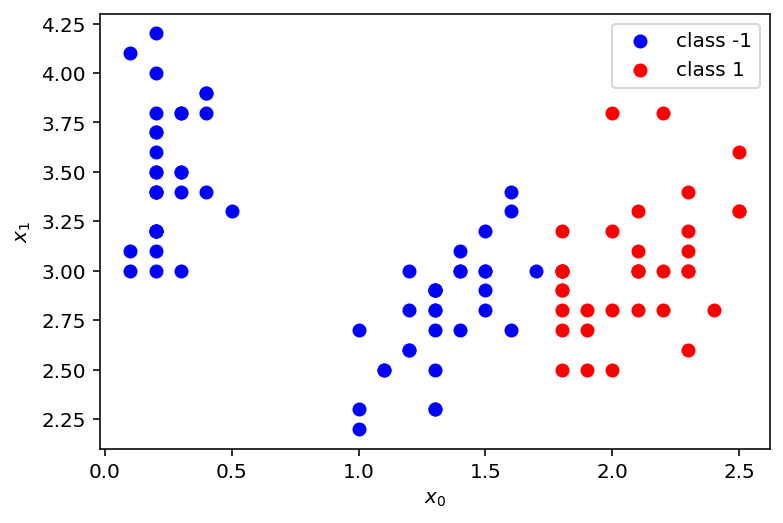

In [75]:
# Visualize training set.
vis(X_train, Y_train)

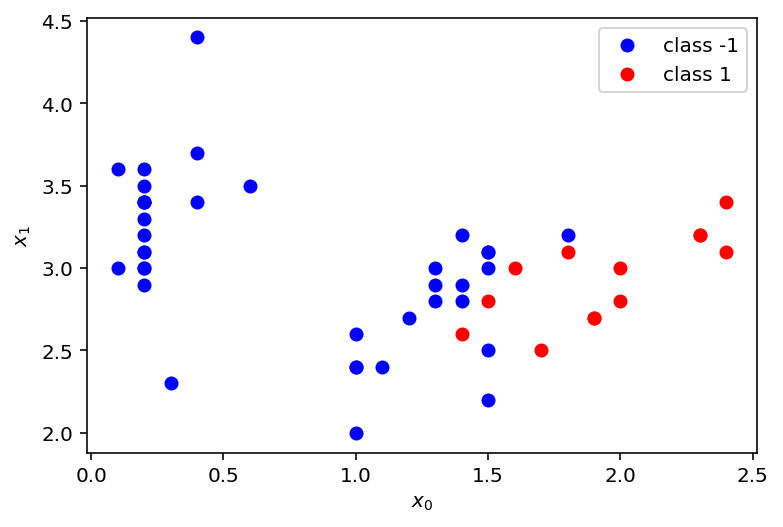

In [76]:
# Visualize test set.
vis(X_test, Y_test)

### Perceptron Algorithm

In this problem, we would like to train a perceptron model for the classification task on a modified Iris dataset. The training procedure of the perceptron model is shown in the algorithm below:

<img src="perceptron-algorithm.png" width=600 align="left">

Note that in the code, we use `X_train` and `Y_train` to represent the feature vector $X$ and labels $Y$ in training set $S_\text{training}$. Besides, we use `W` and `b` to represent the weight vector $\mathbf{w}$ and bias scalar $b$.

Please fill the blanks of the skeleton code below to complete the perceptron training procedure.

**Hint**: For the implementation of some functions, you may refer to HW2 Q5.

In [77]:
# Judge function: 1(a != b).
def judge(a, b):
    if a!=b:
        return 1
    else:
        return 0
    
# Perceptron classifier.
def f_perceptron(x, W, b):
    # x should be a 2-dimensional vector, 
    # W should be a 2-dimensional vector,
    # b should be a scalar.
    # you should return a scalar which is -1 or 1.
    if (np.dot(W.T, x)+b) >= 0:
        return 1
    else:
        return -1
    
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, W, b):
    
    sum_error = 0
    for (xi, yi) in zip(X, Y):
        # Hint: Use judge() and f_perceptron()
        sum_error = sum_error + judge(yi, f_perceptron(xi, W, b))
    
    return sum_error / len(X)

In [78]:
# Some settings.
errors = []           # Error history.
lam    = 1            # Lambda which controls the step size.

# Initialization.
W      = np.zeros(2)  # Weight.
b      = 0.0          # Bias.

# Perceptron learning algorithm.
while calc_error(X_train, Y_train, W, b) > 0:
    for xi, yi in zip(X_train, Y_train):   # Iterate over all data points.
        p = f_perceptron(xi, W, b)         # Compute the model prediction.
        if yi==p:                          # Compare prediction and label.
            continue                       # - If correct, continue.
        else:
            W = W + lam*(yi-p)*xi   # - If not, update weight and bias.
            b = b + lam*(yi-p) 
            
    # Track training errors. 
    errors.append(calc_error(X_train, Y_train, W, b))

#### Visualize the results

Decision boundary: 70.200x0+-24.800x1+-46.000=0


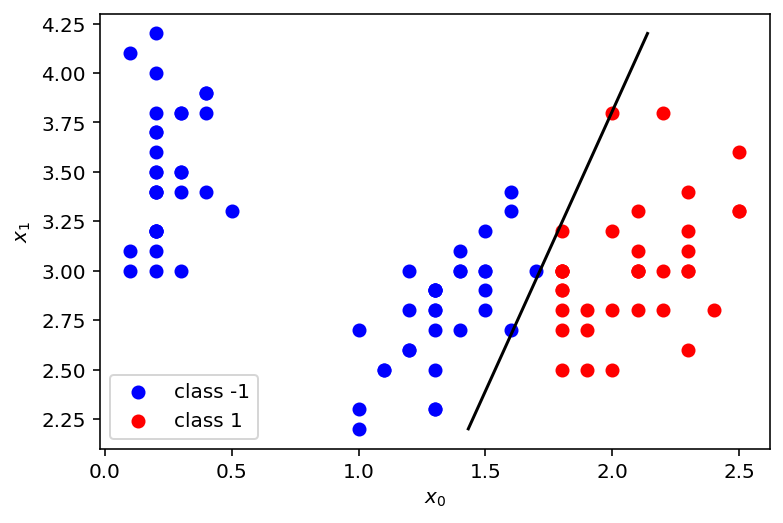

Training error: 0.0


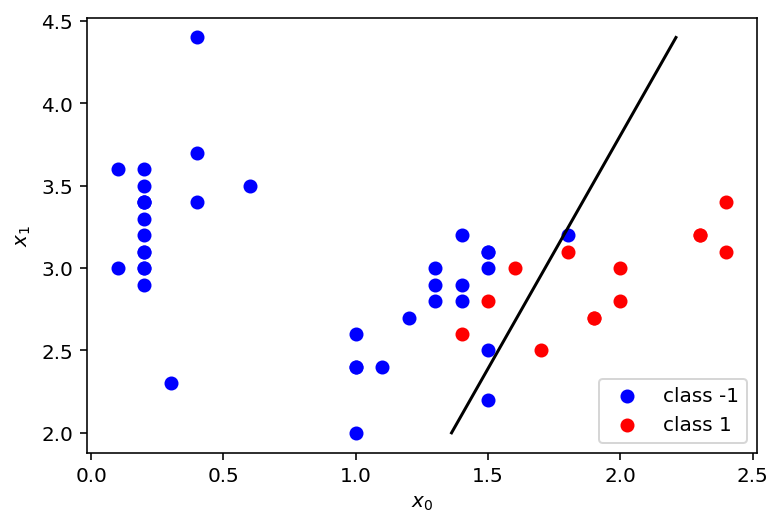

Test error: 0.1


In [79]:
# Show decision boundary, training error and test error.
print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))
vis(X_train, Y_train, W, b)
print('Training error: {}'.format(calc_error(X_train, Y_train, W, b)))
vis(X_test, Y_test, W, b)
print('Test error: {}'.format(calc_error(X_test, Y_test, W, b)))

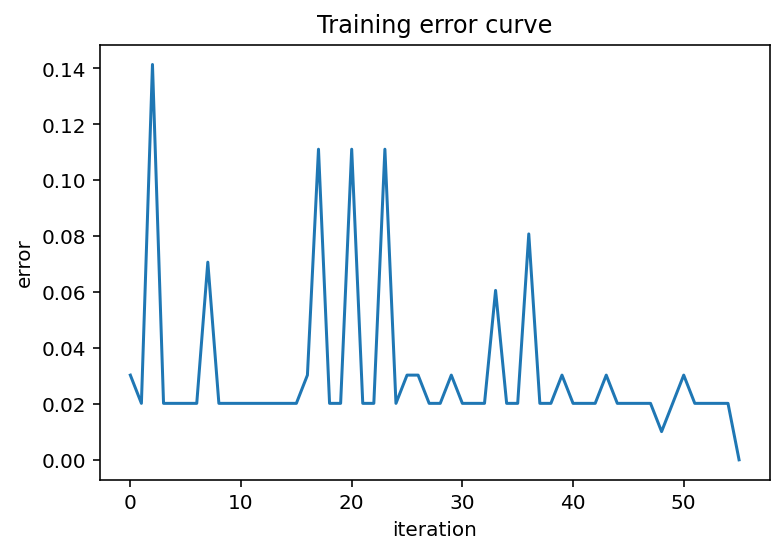

In [80]:
# Plot training error curve.
plt.title('Training error curve')
plt.plot(errors)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()